In [2]:
import pandas as pd

In [3]:
# Opening the dataset
df = pd.read_csv("Crop_recommendation.csv")

### Early Data Analysis ###

In [12]:
# total ofrows and columns
df.shape

(2200, 8)

In [13]:
# Column's name
df.columns.tolist()

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

In [15]:
# Missing values per colum
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [19]:
# Data types
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [22]:
# Previous first rows
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [24]:
# Class distribution in the target value
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

### Visualizaton of Distribution and Correlation ###

In [25]:
# Importing libraries needed
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Define visual style
sns.set(style='whitegrid')

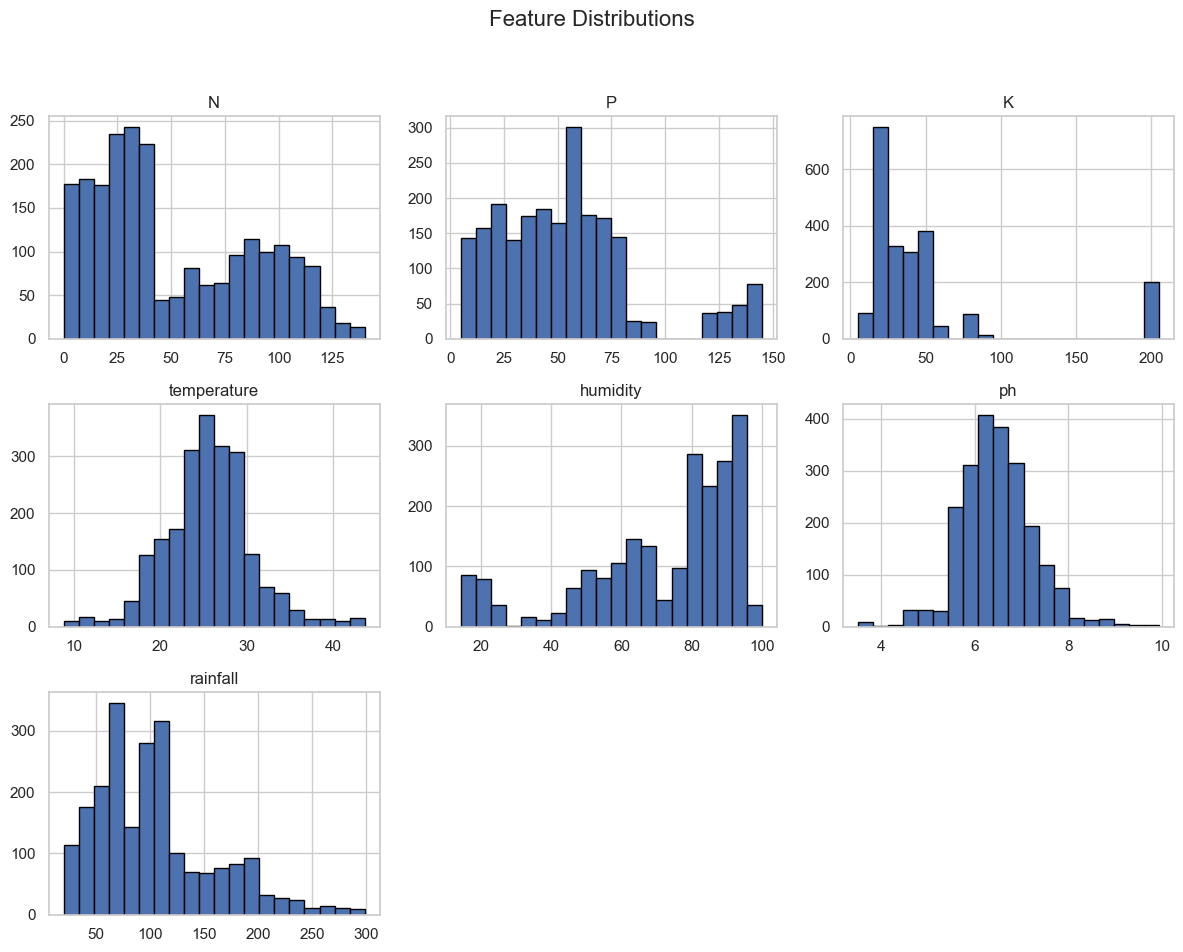

In [29]:
# Creating Histograms for numerical features
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

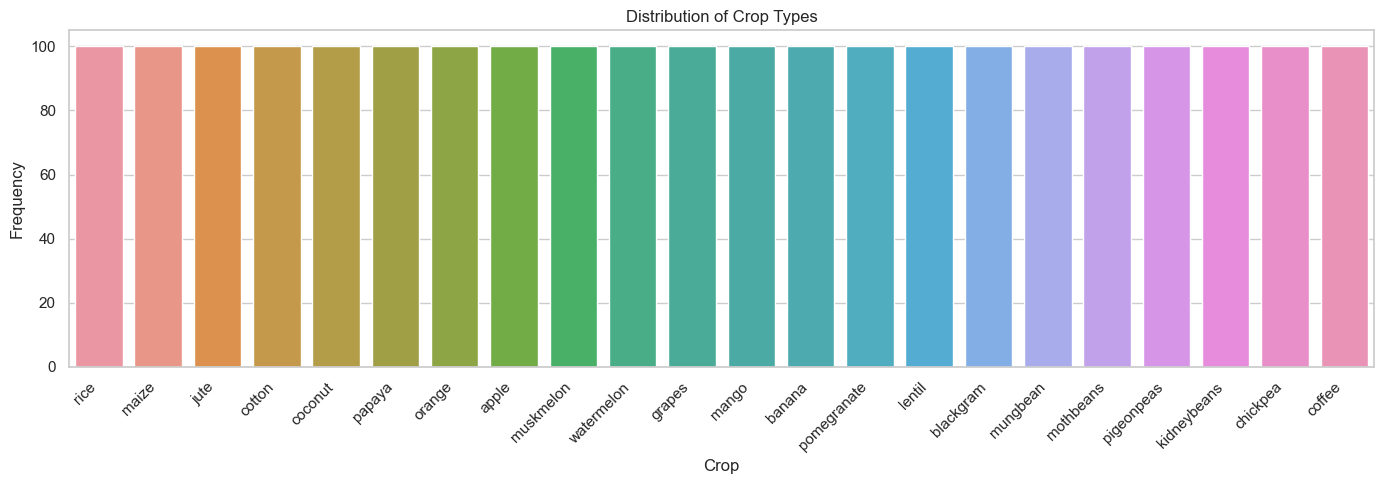

In [30]:
# Creating a bar plot for class distribution
plt.figure(figsize=(14, 5))
sns.countplot(x='label', data=df, order=df['label'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Crop Types")
plt.xlabel("Crop")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()    

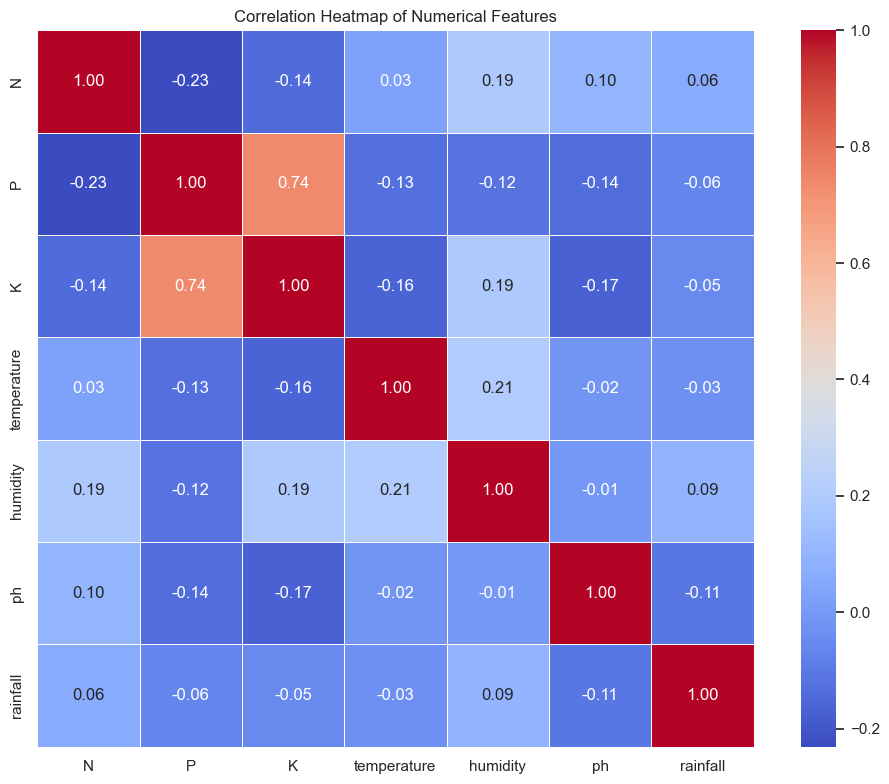

In [34]:
# Creating a Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.drop('label', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

### Pre Processing ###

In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Remove duplicate rows
df = df.drop_duplicates()

# Separate features (X) and target variable (y)
X = df.drop("label", axis=1)
y = df["label"]

# Enconded the target label with LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Make the features standard
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualization of the final shapess
print("Shape of input features (X):", X_scaled.shape)
print("Shape of target (y):", y_encoded.shape)

Shape of input features (X): (2200, 7)
Shape of target (y): (2200,)


### Train Test Splint + Cross Validation ###

In [38]:
# Importing libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np


In [39]:
# Function to evaluete a split
def evaluate_split(test_size):
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_encoded, test_size=test_size, random_state=42, stratify=y_encoded
    )
    
    model = RandomForestClassifier(random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    print(f"\n=== Test Size: {int(test_size*100)}% ===")
    print("Cross-validation scores:", np.round(cv_scores, 4))
    print("Mean accuracy:", round(np.mean(cv_scores), 4))

# Run evalutation for each split
evaluate_split(0.05)
evaluate_split(0.10)
evaluate_split(0.20)



=== Test Size: 5% ===
Cross-validation scores: [0.9928 0.9976 0.9976 0.9904 0.9952]
Mean accuracy: 0.9947

=== Test Size: 10% ===
Cross-validation scores: [0.9949 0.9848 0.9975 1.     0.9975]
Mean accuracy: 0.9949

=== Test Size: 20% ===
Cross-validation scores: [0.9915 0.9943 0.9972 0.9972 0.9858]
Mean accuracy: 0.9932


### Building two models and comparing them ###

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
# Split the data into training and testing sets (As the previous train-test split brought very close results, lets go with the "standard" 80/20 train-test split)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [46]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [48]:
# Support Vector Machine Model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

In [51]:
# Visualization both models
print("=== Random Forest Classification Report ===")
print(classification_report(y_test, rf_preds))

print("=== Random Forest Confusion Matrix ===")
print(confusion_matrix(y_test, rf_preds))

print("\n=== SVM Classification Report ===")
print(classification_report(y_test, svm_preds))

print("=== SVM Confusion Matrix ===")
print(confusion_matrix(y_test, svm_preds))


=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00    

### Hyperparameters GRIDSEARCHCV ###

In [53]:
# Importing Libreries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [54]:
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", round(grid_search.best_score_, 4))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.996


In [55]:
# Re-train model with best parameters from GridSearchCV
best_rf_model = RandomForestClassifier(
    bootstrap=True,
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

best_rf_model.fit(X_train, y_train)

# Predict on the test set
tuned_preds = best_rf_model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print("=== Tuned Random Forest Classification Report ===")
print(classification_report(y_test, tuned_preds))

print("=== Tuned Random Forest Confusion Matrix ===")
print(confusion_matrix(y_test, tuned_preds))


=== Tuned Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.